## **Load Required Libraries**

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Load Required dataset**

In [ ]:
uploaded = files.upload()

Saving Superstore.csv to Superstore.csv


In [ ]:
df = pd.read_csv('Superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,11/8/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,11/8/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,6/12/2017,6/16/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,10/11/2016,10/18/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,10/11/2016,10/18/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## **1.Profitabilty by Category**

In [ ]:
df['ProfitMargin'] = df['Profit']/df['Sales']
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,ProfitMargin
0,1,CA-2017-152156,11/8/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600
1,2,CA-2017-152156,11/8/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000
2,3,CA-2017-138688,6/12/2017,6/16/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700
3,4,US-2016-108966,10/11/2016,10/18/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000
4,5,US-2016-108966,10/11/2016,10/18/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125


In [ ]:
## mean profit margin for every category
category_margin = df.groupby('Category')['ProfitMargin'].mean()
category_margin

,ProfitMargin
Category,
Furniture,0.038784
Office Supplies,0.138030
Technology,0.156138


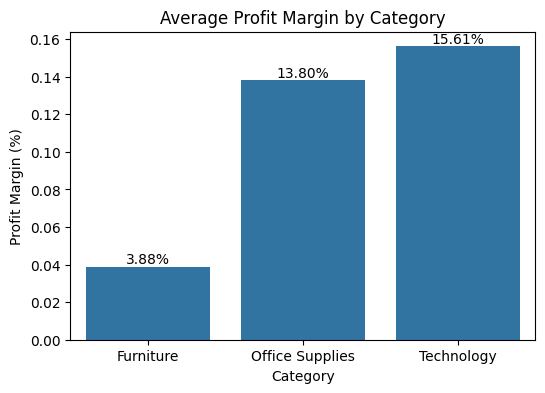

In [ ]:
plt.figure(figsize=(6,4))
# Convert the Series to a DataFrame suitable for seaborn
category_margin_df = category_margin.reset_index()
ax = sns.barplot(x="Category", y="ProfitMargin", data=category_margin_df)

# Add percentage labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width()/2., p.get_height()), ha="center", va="bottom")
plt.title("Average Profit Margin by Category")
plt.ylabel("Profit Margin (%)")
plt.show()

The most profitable category is Technology while the least profitable one is Furniture

## **2.Regional Sales Trend Over Time(Line Chart)**

In [ ]:
df['OrderMonth'] = pd.to_datetime(df['Order Date']).dt.to_period('M')
monthly_sale = df.groupby(['Region', 'OrderMonth'])['Sales'].sum().reset_index()
monthly_sale.head()

,Region,OrderMonth,Sales
0,Central,2015-01,1539.906
1,Central,2015-02,1233.174
2,Central,2015-03,5827.602
3,Central,2015-04,3712.340
4,Central,2015-05,4048.506


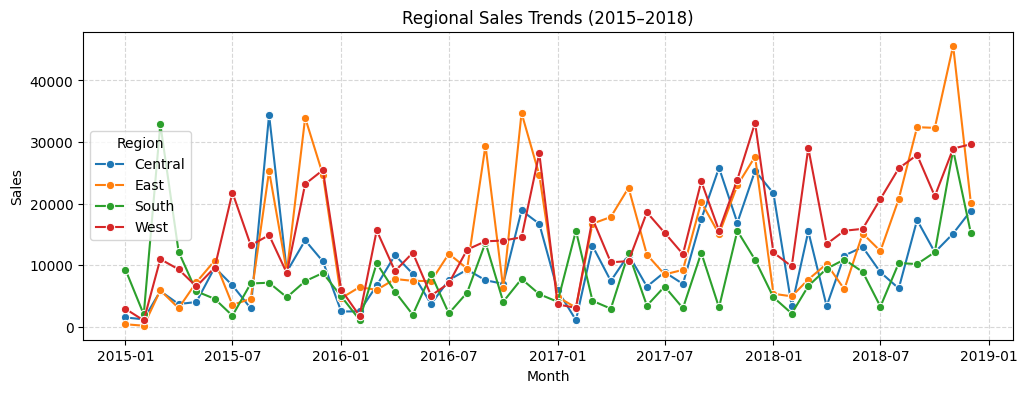

In [ ]:
#Plotting four lines
monthly_sale['OrderMonth'] = monthly_sale['OrderMonth'].dt.to_timestamp()
plt.figure(figsize=(12,4))
sns.lineplot(x="OrderMonth", y="Sales", hue="Region",
             data=monthly_sale, marker="o")

plt.title("Regional Sales Trends (2015–2018)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

The region with the strongest growth is the West with a clear uptrend in the number of sales .The sales generally decrease as the new year kicks and and tend to peak in the second half of the year.

 ## **3. Discount vs. Profit Relationship (Scatter Plot)**


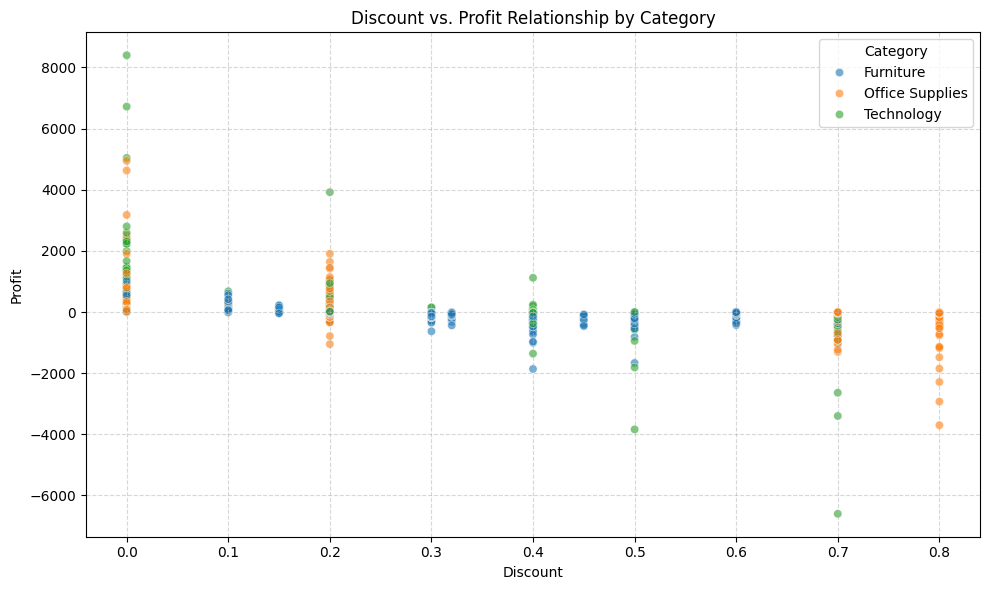

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', hue='Category', data=df, alpha=0.6)
plt.title('Discount vs. Profit Relationship by Category')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout() # Ensures all elements fit within the figure area
plt.show()

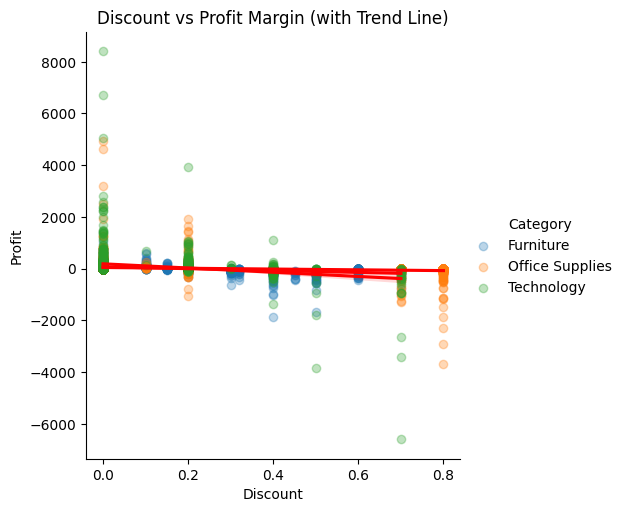

In [ ]:
sns.lmplot(x="Discount", y="Profit", data=df, hue="Category",
           fit_reg=True,
           scatter_kws={"alpha":0.3}, line_kws={"color":"red"})
plt.title("Discount vs Profit Margin (with Trend Line)")
plt.show()


There is an inverse relationship between discounts and profitability.The higher the aggressive discounts the lower the profits.The most affected area is office supplies

## **4.Sales Distribution Analysis**

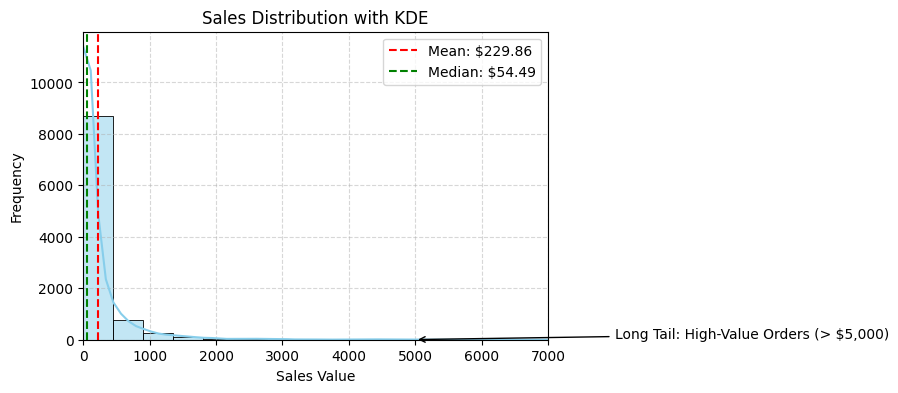

In [ ]:

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Sales', bins=50, kde=True, color="skyblue")
plt.xlim(0, 7000)
plt.title("Sales Distribution with KDE")
plt.xlabel("Sales Value")
plt.ylabel("Frequency")
mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()

plt.axvline(mean_sales, color="red", linestyle="--", label=f"Mean: ${mean_sales:.2f}")
plt.axvline(median_sales, color="green", linestyle="--", label=f"Median: ${median_sales:.2f}")
plt.annotate("Long Tail: High-Value Orders (> $5,000)", xy=(5000, 5), xytext=(8000, 50), arrowprops=dict(facecolor="black", arrowstyle="->"))
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)


## **5.Heatmap**


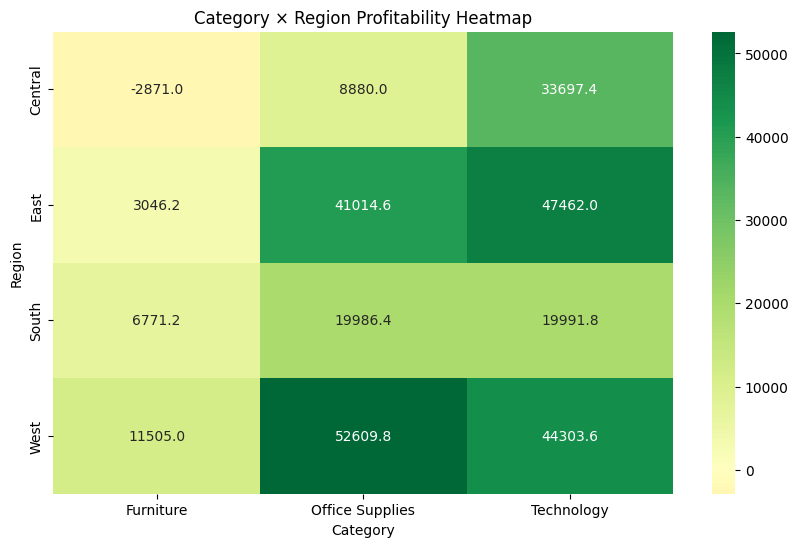

In [ ]:
## Creating Pivot Table
pivot = df.pivot_table( index="Region", columns="Category", values="Profit", aggfunc="sum" )
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True,
            fmt=".1f",
            cmap="RdYlGn",
            center=0)
plt.title("Category × Region Profitability Heatmap")
plt.ylabel("Region")
plt.xlabel("Category")
plt.show()

The region-category that drives the most profitability is the West-Office supplies category while the biggest loss is the Central-Furniture

## **6.Executive summary**

 Insight for CEO: To focus on the inverse relationship between discounts and profit, particularly in the Furniture category and Central region where significant losses were identified.
Customer Segment for Retention:The current analysis does not provide sufficient data or insights on customer segments for targeted retention, as no specific analysis on customer lifetime value, churn, or segment-wise profitability has been performed.
Data Limitations for Deeper Analysis: Data limitations that prevent deeper analysis, such as the absence of comprehensive customer lifecycle data (e.g., customer acquisition cost, customer lifetime value, repeat purchase behavior) and detailed cost of goods sold (COGS) data for products.